**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [3]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [4]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [5]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [6]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [10]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



## Arrange table

In [11]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [12]:
lst = lst_dat_region_score
dat = lst[[1]]
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
chr1,10015,10442,chr1:10015-10442,-3.7814427,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14253,14645,chr1:14253-14645,0.5653917,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16015,16477,chr1:16015-16477,-2.0997884,Scale(Log2FC),ASTARR_KS91,ASTARR


## Helper function

In [13]:
fun_distance_correlation = function(x, y) {
    ### get distance matrix
    n = length(x)
    A = as.matrix(dist(x))
    B = as.matrix(dist(y))
    
    ### double center
    A_c = A - rowMeans(A) - colMeans(A) + mean(A)
    B_c = B - rowMeans(B) - colMeans(B) + mean(B)
    
    ### raw sums
    dcov2 = sum(A_c * B_c) / (n * n)
    dvarx = sum(A_c * A_c) / (n * n)
    dvary = sum(B_c * B_c) / (n * n)
    
    ### ensure positive; avoid tiny negatives
    dcov2 = max(dcov2, 0)
    dvarx = max(dvarx, 0)
    dvary = max(dvary, 0)
    
    ### compute distance correlation
    dcor = sqrt(dcov2) / sqrt(sqrt(dvarx * dvary))
    return(dcor)
}

## Execute

In [14]:
lol = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_out]]
    
    ### get the score of output assay
    dat = dat %>% 
        dplyr::mutate(Score_CRISPR = Score) %>%
        dplyr::select(Region, Score_CRISPR) %>%
        dplyr::distinct()
    dat_region_score_out = dat

    ###
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ### get the output assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_inp]]
        
        ### get the score of output assay
        dat = dat %>% 
            dplyr::mutate(Score_STARRMPRA = Score) %>%
            dplyr::select(Region, Score_STARRMPRA) %>%
            dplyr::distinct()
        dat_region_score_inp = dat

        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_score_out,
            dat_region_score_inp,
            by = "Region"
        )
        return(dat)
    })
    return(lst)
})

### assign and show
lol_region_score_merge = lol
print(names(lol))
lst = lol[[1]]
print(names(lst))
dat = lst[[1]]
fun_display_table(head(dat, 3))

[1] "CRISPRi-HCRFF"         "CRISPRi-Growth"        "ENCODE-rE2G Benchmark"
[1] "ASTARR" "WSTARR" "LMPRA"  "TMPRA"  "ATAC"  


Region,Score_CRISPR,Score_STARRMPRA
chr11:4092104-4092566,-0.1340399,0.5588223
chr11:4094204-4095676,-0.0482194,2.5172737
chr11:4144511-4147030,-0.0702490,0.1706916


In [15]:
lol = lol_region_score_merge
lst = lapply(lol, function(lst){
    lst = lapply(lst, function(dat){
        ### get x and y
        x = dat$Score_CRISPR
        y = dat$Score_STARRMPRA

        ### observed correlation
        num_obs_scor = cor(x, y, method = "spearman")
        num_obs_dcor = 1 #fun_distance_correlation(x, y)

        ### arrange results
        vec = c("Spearman_Corr" = num_obs_scor, "Distanc_Corr" = num_obs_dcor)
        return(vec)
    })
    dat = bind_rows(lst, .id = "Assay_STARRMPRA")
    return(dat)
})

dat = bind_rows(lst, .id = "Assay_CRISPR")
dat

Assay_CRISPR,Assay_STARRMPRA,Spearman_Corr,Distanc_Corr
<chr>,<chr>,<dbl>,<dbl>
CRISPRi-HCRFF,ASTARR,0.038667725,1
CRISPRi-HCRFF,WSTARR,0.034993732,1
CRISPRi-HCRFF,LMPRA,0.018214615,1
CRISPRi-HCRFF,TMPRA,0.001948634,1
CRISPRi-HCRFF,ATAC,0.065942369,1
CRISPRi-Growth,ASTARR,-0.018095172,1
CRISPRi-Growth,WSTARR,0.093813614,1
CRISPRi-Growth,LMPRA,0.073245635,1
CRISPRi-Growth,TMPRA,0.153373663,1


In [52]:
lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay_out]]
    
    ### get the score of output assay
    dat = dat %>% 
        dplyr::mutate(Score_CRISPR = Score) %>%
        dplyr::select(Region, Score_CRISPR) %>%
        dplyr::distinct()
    dat_region_score_out = dat

    ###
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ### get the output assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay_inp]]
        
        ### get the score of output assay
        dat = dat %>% 
            dplyr::mutate(Score_STARRMPRA = Score) %>%
            dplyr::select(Region, Score_STARRMPRA) %>%
            dplyr::distinct()
        dat_region_score_inp = dat

        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_score_out,
            dat_region_score_inp,
            by = "Region"
        )
        return(dat)
    })
    dat_region_group_merge = bind_rows(lst, .id = "Assay_STARRMPRA")

    ###
    dat = dat_region_group_merge
    dat = dat %>% dplyr::mutate(
        Assay_STARRMPRA = factor(Assay_STARRMPRA, levels = VEC_TXT_ASSAY_INP),
        Group_CRISPR    = factor(Group_CRISPR,    levels = c(0, 1), labels = c("non-hit", "hit")),
        Group_STARRMPRA = factor(Group_STARRMPRA, levels = c(0, 1), labels = c("non-hit", "hit"))
    )

    ###
    fit = glm(
        Group_CRISPR ~ Group_STARRMPRA * Assay_STARRMPRA, 
        data   = dat,
        family = binomial(link = "logit")
    )
    return(fit)
})

lst_logit_fit = lst
print(names(lst))

fit = lst[[1]]
print(fit)

[1] "CRISPRi-HCRFF"         "CRISPRi-Growth"        "ENCODE-rE2G Benchmark"

Call:  glm(formula = Group_CRISPR ~ Group_STARRMPRA * Assay_STARRMPRA, 
    family = binomial(link = "logit"), data = dat)

Coefficients:
                             (Intercept)  
                                -2.36047  
                      Group_STARRMPRAhit  
                                 0.88962  
                   Assay_STARRMPRAWSTARR  
                                 0.07281  
                    Assay_STARRMPRALMPRA  
                                 0.03157  
                    Assay_STARRMPRATMPRA  
                                -0.27482  
                     Assay_STARRMPRAATAC  
                                -0.02781  
Group_STARRMPRAhit:Assay_STARRMPRAWSTARR  
                                -0.28483  
 Group_STARRMPRAhit:Assay_STARRMPRALMPRA  
                                -0.43252  
 Group_STARRMPRAhit:Assay_STARRMPRATMPRA  
                                 0.37879  
  Group_STA

**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
#library(coin)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [3]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [4]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [5]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [6]:
TXT_ASSAY_OUT = "CRISPRi-HCRFF"

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY = vec

**Check input files**

In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [10]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



In [20]:
distance_correlation <- function(x, y) {
  n <- length(x)
  A <- as.matrix(dist(x))
  B <- as.matrix(dist(y))
  
  # double center
  A_c <- A - rowMeans(A) - colMeans(A) + mean(A)
  B_c <- B - rowMeans(B) - colMeans(B) + mean(B)
  
  # raw sums
  dcov2 <- sum(A_c * B_c) / (n * n)
  dvarx <- sum(A_c * A_c) / (n * n)
  dvary <- sum(B_c * B_c) / (n * n)
  
  # guard against tiny negatives
  dcov2 <- max(dcov2, 0)
  dvarx <- max(dvarx, 0)
  dvary <- max(dvary, 0)
  
  # compute distance correlation
  sqrt(dcov2) / sqrt(sqrt(dvarx * dvary))
}

In [12]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [15]:
### get the output assay
lst = lst_dat_region_score
dat = lst[[TXT_ASSAY_OUT]]
dat = dat %>% dplyr::select(Region, Score) %>% dplyr::rename(Score_CRISPR = Score)
dat_region_score_out = dat
head(dat, 3)

Region,Score_CRISPR
<chr>,<dbl>
chr11:4092104-4092566,-0.13403994
chr11:4094204-4095676,-0.04821938
chr11:4144511-4147030,-0.07024901


In [19]:
### get the output assay
lst = lst_dat_region_score
dat = lst[[TXT_ASSAY_OUT]]
dat = dat %>% dplyr::select(Region, Score) %>% dplyr::rename(Score_CRISPR = Score)
dat_region_score_out = dat

txt_assay = "WSTARR"

### get the input assay
lst = lst_dat_region_score
dat = lst[[txt_assay]]
dat = dat %>% dplyr::select(Region, Score) %>% dplyr::rename(Score_Reporter = Score)
dat_region_score_inp = dat

### combine group and score
dat = dplyr::inner_join(
    dat_region_score_out,
    dat_region_score_inp,
    by = "Region"
)
dat_region_merge = dat

# 2) Compute the observed distance correlation
dat = dat_region_merge
x   = dat$Score_CRISPR   # your CRISPRi z-scores
y   = dat$Score_Reporter # your reporter scores
obs_dcor = distance_correlation(x, y)

obs_dcor

[1] 0.2532192

In [21]:
### get the output assay
lst = lst_dat_region_score
dat = lst[[TXT_ASSAY_OUT]]
dat = dat %>% dplyr::select(Region, Score) %>% dplyr::rename(Score_CRISPR = Score)
dat_region_score_out = dat

lst = lapply(VEC_TXT_ASSAY, function(txt_assay){
    ### get the input assay
    lst = lst_dat_region_score
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score) %>% dplyr::rename(Score_Reporter = Score)
    dat_region_score_inp = dat
    
    ### combine group and score
    dat = dplyr::inner_join(
        dat_region_score_out,
        dat_region_score_inp,
        by = "Region"
    )
    dat_region_merge = dat

    # 2) Compute the observed distance correlation
    dat = dat_region_merge
    x   = dat$Score_CRISPR   # your CRISPRi z-scores
    y   = dat$Score_Reporter # your reporter scores
    obs_dcor = distance_correlation(x, y)
    
    # 3) Permutation test to get a p-value
    set.seed(123)
    B = 100
    perm_dcors = replicate(B, {
      y_perm = sample(y) # randomly shuffle y
      distance_correlation(x, y_perm)
    })
    p_value <- mean(perm_dcors >= obs_dcor)    # one-sided test
    
    # 4) Report
    cat(sprintf(
      "Observed dCor = %.4f; permutation p = %.4g\n", 
      obs_dcor, p_value
    ))
    
    ###
    res = tibble(
        "dCor"   = obs_dcor, 
        "Pvalue" = p_value, 
        "Size"   = as.integer(nrow(dat_region_merge))
    )
    return(res)
})

###
dat = bind_rows(lst, .id = "Assay_Input")
dat$Assay_Output = TXT_ASSAY_OUT
head(dat)

Observed dCor = 0.3373; permutation p = 0
Observed dCor = 0.2532; permutation p = 0.01
Observed dCor = 0.2071; permutation p = 0.02
Observed dCor = 0.3424; permutation p = 0
Observed dCor = 0.4537; permutation p = 0


Assay_Input,dCor,Pvalue,Size,Assay_Output
<chr>,<dbl>,<dbl>,<int>,<chr>
ASTARR,0.3372526,0.00,1330,CRISPRi-HCRFF
WSTARR,0.2532192,0.01,1306,CRISPRi-HCRFF
LMPRA,0.2070989,0.02,721,CRISPRi-HCRFF
TMPRA,0.3423868,0.00,632,CRISPRi-HCRFF
ATAC,0.4536955,0.00,1330,CRISPRi-HCRFF


In [41]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [34]:
vec_num_hit_rate = c(0.01, 0.05, 0.1)
names(vec_num_hit_rate) = c("Top 1%", "Top 5%", "Top 10%")

In [40]:
lst = lapply(vec_num_hit_rate, function(num_hit_rate){
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[TXT_ASSAY_OUT]]
    
    ### get the score of output assay
    vec = dat$Score
    vec = abs(vec)
    vec_num_score_out = vec
    
    ### determine score cutoff
    num_cutoff = quantile(vec_num_score_out, probs = 1 - num_hit_rate)
    
    ### setup group by cutoff
    dat$Group = ifelse(vec_num_score_out >= num_cutoff, 1, 0)
    dat = dat %>% dplyr::select(Region, Group)
    dat_region_group = dat

    lst = lapply(VEC_TXT_ASSAY, function(txt_assay){
        ### get the input assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay]]
        dat = dat %>% dplyr::select(Region, Score)
        dat_region_score_inp = dat
        
        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_group,
            dat_region_score_inp,
            by = "Region"
        )
        dat_region_merge = dat
    
        ###
        dat  = dat_region_merge
        lst  = split(dat$Score, dat$Group)
        vec1 = lst[["1"]]
        vec2 = lst[["0"]]
        num  = fun_cliffs_delta(vec1, vec2)
        num_cliffs_delta = num
        
        ###
        dat  = dat_region_merge
        fit = wilcox.test(Score ~ Group, data = dat)
        
        ###
        res = tibble(
            "Statistics"   = fit$statistic, 
            "Pvalue"       = fit$p.value, 
            "Size"         = as.integer(nrow(dat)), 
            "Cliffs_Delta" = round(num_cliffs_delta, 3)
        )
        return(res)
    })

    ###
    dat = bind_rows(lst, .id = "Assay_Input")
    dat$Assay_Output = TXT_ASSAY_OUT
    dat$CutOff       = num_cutoff

    return(dat)
})

dat = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Is_Signif = Pvalue < 0.01) %>%
    dplyr::select(Assay_Output, Assay_Input, Label, CutOff, Statistics, Pvalue, Is_Signif, Size, Cliffs_Delta)
dat

Assay_Output,Assay_Input,Label,CutOff,Statistics,Pvalue,Is_Signif,Size,Cliffs_Delta
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>
CRISPRi-HCRFF,ASTARR,Top 1%,1.2258364,5543.0,1.028061e-02,FALSE,1330,0.398
CRISPRi-HCRFF,WSTARR,Top 1%,1.2258364,4962.0,3.638811e-03,TRUE,1306,0.451
CRISPRi-HCRFF,LMPRA,Top 1%,1.2258364,3136.5,1.184740e-01,FALSE,721,0.263
CRISPRi-HCRFF,TMPRA,Top 1%,1.2258364,759.0,2.953451e-03,TRUE,632,0.653
CRISPRi-HCRFF,ATAC,Top 1%,1.2258364,3053.0,1.646718e-05,TRUE,1330,0.669
CRISPRi-HCRFF,ASTARR,Top 5%,0.4836082,34869.0,1.514840e-02,FALSE,1330,0.176
CRISPRi-HCRFF,WSTARR,Top 5%,0.4836082,30557.0,5.188335e-04,TRUE,1306,0.253
CRISPRi-HCRFF,LMPRA,Top 5%,0.4836082,9751.0,2.513025e-03,TRUE,721,0.284
CRISPRi-HCRFF,TMPRA,Top 5%,0.4836082,5879.0,2.863946e-03,TRUE,632,0.328


## Prepare CRISPR z-cutoff

In [10]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [11]:
### get the output assay
lst = lst_dat_region_score
dat = lst[[TXT_ASSAY_OUT]]

### get the score of output assay
vec = dat$Score
vec = abs(vec)
vec_num_score = vec

### determine score cutoff
num_hit_rate = 0.01
num_cutoff = quantile(vec_num_score, probs = 1 - num_hit_rate)
cat("Score Cut-Off:", "\n")
print(num_cutoff)
cat("\n")

### setup group by cutoff
dat$Group = ifelse(vec_num_score >= num_cutoff, 1, 0)
dat = dat %>% dplyr::select(Region, Group)

### assign and show
dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

Score Cut-Off: 
     99% 
1.225836 

[1] 1330    2


Region,Group
chr11:4092104-4092566,0
chr11:4094204-4095676,0
chr11:4144511-4147030,0


## Test

In [33]:
lst = lapply(VEC_TXT_ASSAY, function(txt_assay){
    ###
    lst = lst_dat_region_score
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat
    
    ### combine group and score
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ###
    dat  = dat_region_merge
    lst  = split(dat$Score, dat$Group)
    vec1 = lst[["1"]]
    vec2 = lst[["0"]]
    num  = fun_cliffs_delta(vec1, vec2)
    num_cliffs_delta = num
    
    ###
    dat  = dat_region_merge
    fit = wilcox.test(Score ~ Group, data = dat)
    
    ###
    res = tibble(
        "Statistics"   = fit$statistic, 
        "Pvalue"       = fit$p.value, 
        "Size"         = as.integer(nrow(dat)), 
        "Cliffs_Delta" = round(num_cliffs_delta, 3)
    )
    return(res)
})

dat = bind_rows(lst, .id = "Assay")
dat

Assay,Statistics,Pvalue,Size,Cliffs_Delta
<chr>,<dbl>,<dbl>,<int>,<dbl>
ASTARR,5543.0,1.028061e-02,1330,0.398
WSTARR,4962.0,3.638811e-03,1306,0.451
LMPRA,3136.5,1.184740e-01,721,0.263
TMPRA,759.0,2.953451e-03,632,0.653
ATAC,3053.0,1.646718e-05,1330,0.669


In [12]:
txt_assay = "WSTARR"

### get score from each input assay
lst = lst_dat_region_score
dat = lst[[txt_assay]]
dat = dat %>% dplyr::select(Region, Score)
dat_region_score = dat

### combine group and score
dat = dplyr::inner_join(
    dat_region_group,
    dat_region_score,
    by = "Region"
)
dat_region_merge = dat

### apply logistic regression
dat = dat_region_merge
#fit = glm(Group ~ Score, data = dat, family = "binomial")
#vec_boo_group = (dat$Group == 1)
#vec_num_score = predict(fit, type = "response")
print(dim(dat))
fun_display_table(head(dat))

[1] 1306    3


Region,Group,Score
chr11:4092104-4092566,0,0.9554577
chr11:4094204-4095676,0,2.1041193
chr11:4144511-4147030,0,-0.0300852
chr11:4167268-4168022,0,-0.5244894
chr11:4181723-4182583,0,-0.1299241
chr11:4186880-4188018,0,0.7491366


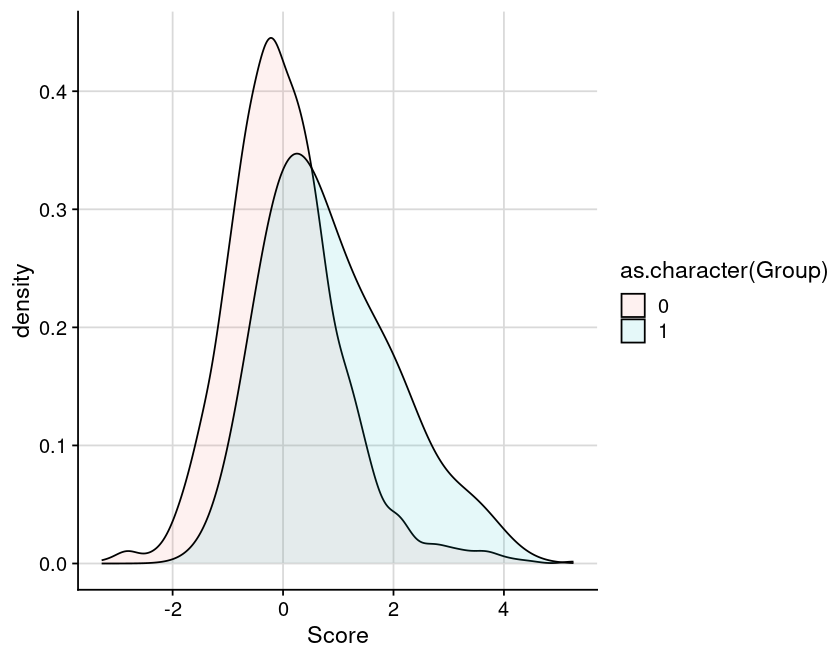

In [15]:
dat = dat_region_merge
gpt = ggplot(dat, aes(x = Score, fill = as.character(Group))) +
    geom_density(alpha = 0.1) +
    theme_cowplot() +
    background_grid()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

In [18]:
res = wilcox.test(Score ~ Group, data = dat_region_merge)
print(res)


	Wilcoxon rank sum test with continuity correction

data:  Score by Group
W = 4962, p-value = 0.003639
alternative hypothesis: true location shift is not equal to 0



In [24]:
c(res$statistic, res$p.value, nrow(dat))

W                           
4.962000e+03 3.638811e-03 1.306000e+03

In [19]:
res$p.value

[1] 0.003638811

In [23]:
nrow(dat_region_merge)

[1] 1306

In [16]:
lst = split(dat$Score, dat$Group)
vec1 = lst[[1]]
vec2 = lst[[2]]
fun_cliffs_delta(vec1, vec2)

[1] -0.451349

In [17]:
names(lst)

[1] "0" "1"